# Data Dashboard for Movies sells

## Installing packages

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Obtaining data from https://www.boxofficemojo.com/weekly/2020W38/?ref_=bo_wly_table_15

In [3]:
#Reading excel file of the gross movie sales of boxofficemojo from 18 to 24 of September of 2020
df = pd.read_excel (r'/content/drive/MyDrive/DSBA_6276/BoxOfficeMojo-Week-Sept._18-24,2020.xlsx')
print(df)

    Rank  LW  ... Weeks                 Distributor
0      1   -  ...     4                Warner Bros.
1      2   2  ...     4        20th Century Studios
2      3   -  ...     1    Cloudburst Entertainment
3      4   3  ...     6            Solstice Studios
4      5   4  ...     2            TriStar Pictures
5      6   5  ...     4    United Artists Releasing
6      7   7  ...     6          Paramount Pictures
7      8   8  ...     4        Searchlight Pictures
8      9   6  ...     5        Roadside Attractions
9     10   -  ...     1           Magnolia Pictures
10    11  15  ...     2       Bleecker Street Media
11    12   -  ...     1      Vertical Entertainment
12    13   9  ...     7   Well Go USA Entertainment
13    14   -  ...     1                   IFC Films
14    15  13  ...     5         Pryor Entertainment
15    16  10  ...     5   Well Go USA Entertainment
16    17  12  ...     8                        Neon
17    18   -  ...     1              Focus Features
18    19  18

## Building the Dashboard 

### Building individual plots



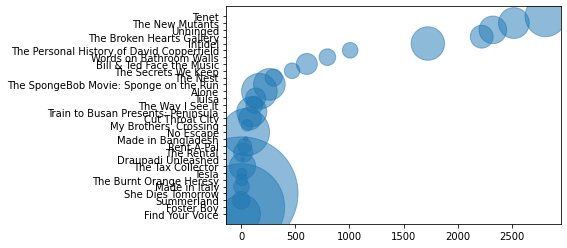

In [10]:
fig, ax = plt.subplots()

ax.autoscale()
df = df.sort_values('Theaters')

ax.scatter(df['Theaters'],df['Release'],s=df['Average'],alpha =.5)

<BarContainer object of 30 artists>

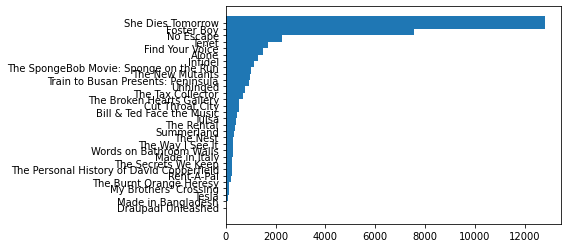

In [5]:
fig1 = plt.subplot()
df = df.sort_values('Average')
fig1.barh(df['Release'],df['Average'], height = 2)

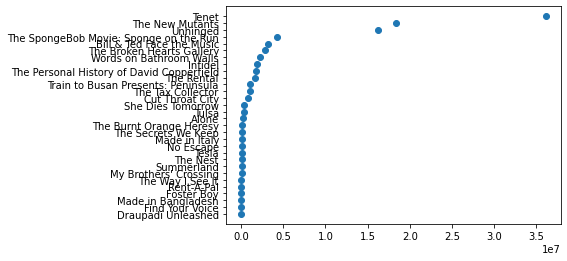

In [9]:
fig2 = plt.subplot()
df = df.sort_values('Total Gross')
fig2.scatter(df['Total Gross'],df['Release'])